# Keras tutorial

In [3]:
import random

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

from utils import display_samples

## MNIST Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train[0].shape

(28, 28)

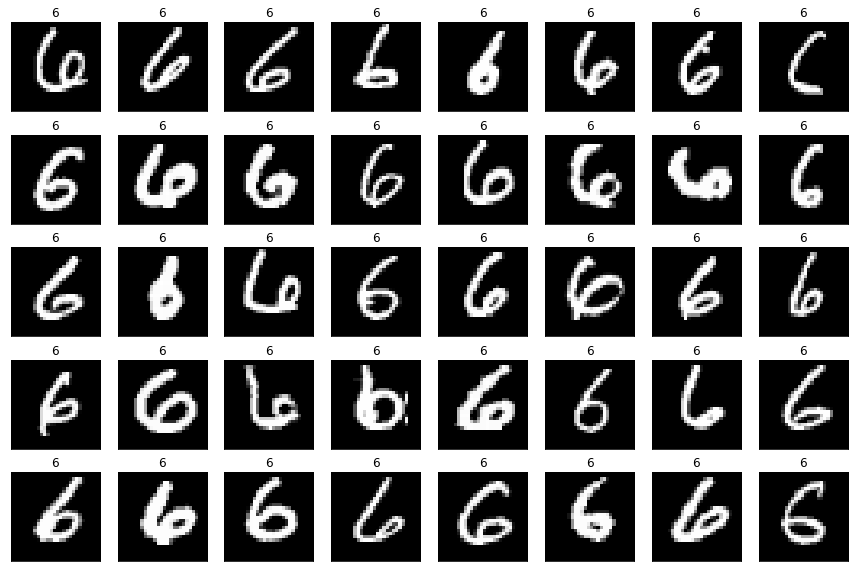

In [7]:
display_samples(x_train, y_train, n_rows=5, n_cols=8, label=6)

## MLP con modello sequenziale

### lista di strati passati al costruttore

In [8]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Costruzione con il metodo add

In [10]:
model = keras.Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

### sommario

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### plot

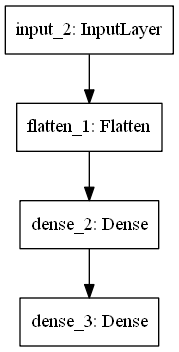

In [12]:
keras.utils.plot_model(model)

### compilazione

La compilazione prepara il modello per l'addestramento.
Vengono definiti:
* il metodo di ottimizzazione
* la funzione di loss
* eventuali metriche

In [13]:
sgd = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

### addestramento

In [14]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='tensorboard_logs', histogram_freq=1, write_graph=True, write_images=True),
    tf.keras.callbacks.ModelCheckpoint('tensorboard_logs/weights.{epoch:02d}-{val_loss:.2f}.tf', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [15]:
h = model.fit(x=x_train, y=tf.one_hot(y_train, 10), batch_size=32, epochs=10, validation_split=0.1, callbacks=callbacks)

Epoch 1/10
   1/1688 [..............................] - ETA: 0s - loss: 149.3796 - accuracy: 0.0000e+00WARNING:tensorflow:From F:\Programmi\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1688/1688 [==============================] - 8s 5ms/step - loss: 1.5863 - accuracy: 0.7523 - val_loss: 0.4647 - val_accuracy: 0.8703
Epoch 2/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4690 - accuracy: 0.8691 - val_loss: 0.3920 - val_accuracy: 0.8893
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3574 - accuracy: 0.8980 - val_loss: 0.3088 - val_accuracy: 0.9140
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9127 - val_loss: 0.2570 - val_accuracy: 0.9307
Epoch 5/10
1688/1688 [==============

### test

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
val_loss, val_accuracy = model.evaluate(x=x_test, y=tf.one_hot(y_test, 10), batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.9419


### predizione

In [56]:
y_prob = model.predict(x=x_test)

In [96]:
y_hat = np.argmax(y_prob, axis=1)

## esame della predizione

In [75]:
def take_test_samples_idxs(y_prob, y_true, is_correct, most_confident, k):
    y_hat = np.argmax(y_prob, axis=1)
    choosable_idxs = np.nonzero(y_hat == y_true)[0] if is_correct else np.nonzero(y_hat != y_true)[0]
    y_hat_prob = np.amax(y_prob, axis=1)
    sorted_idxs = np.argsort(y_hat_prob)
    if most_confident:
        sorted_idxs = sorted_idxs[::-1]
    return sorted_idxs[np.isin(sorted_idxs, choosable_idxs)][:k]

### predizioni corrette con maggiore confidenza

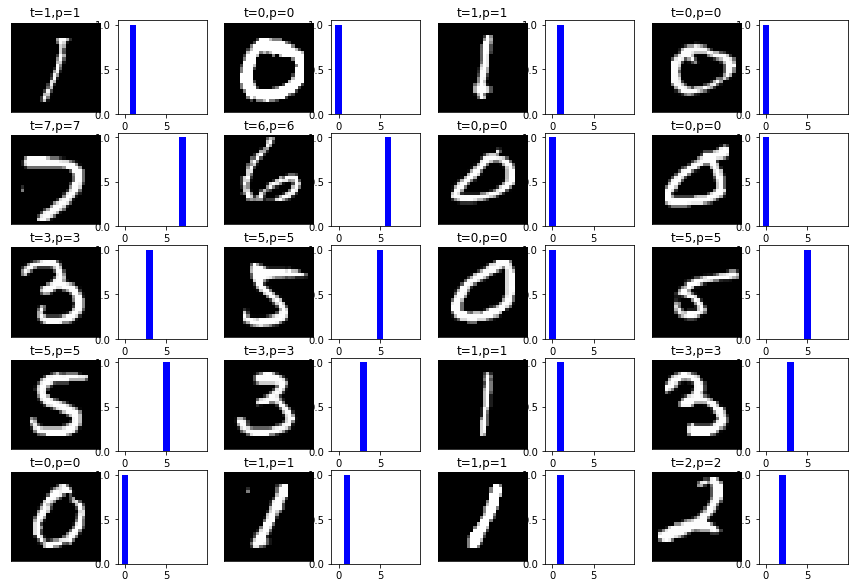

In [135]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni corrette con minore confidenza

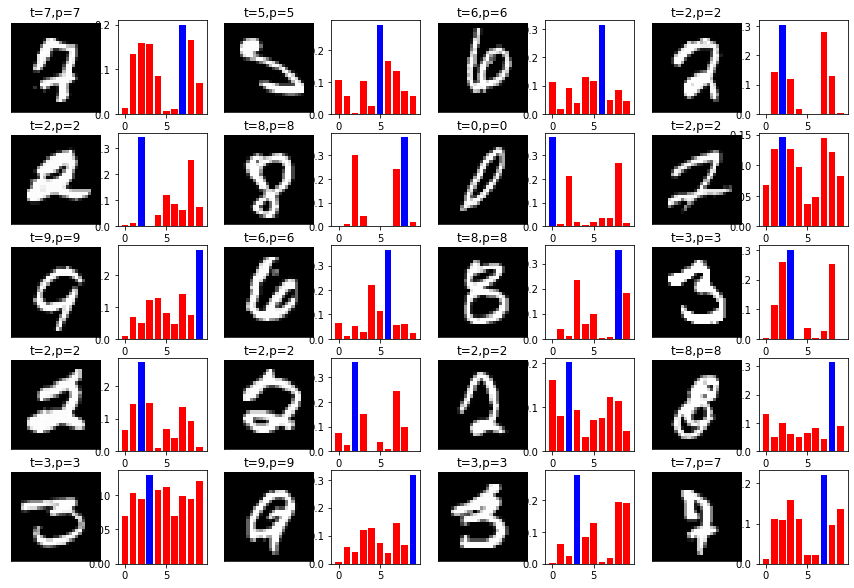

In [134]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con maggiore confidenza

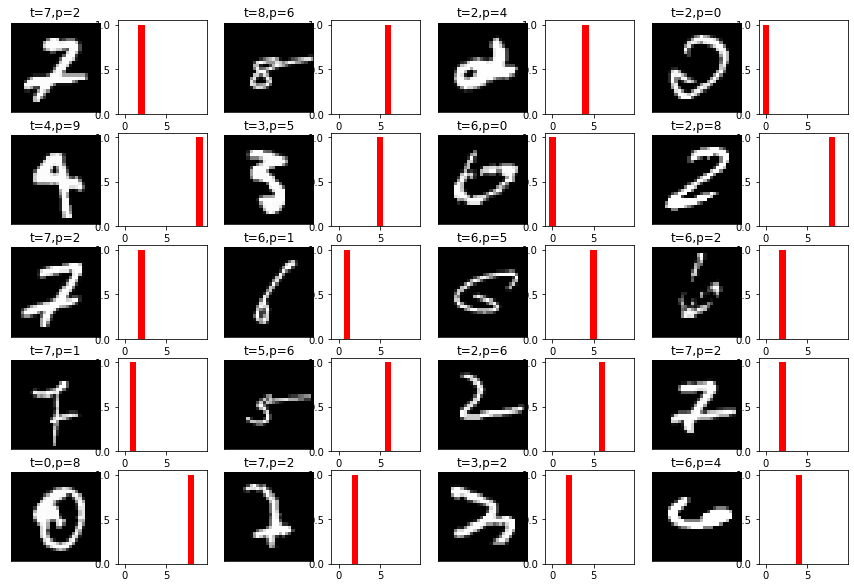

In [136]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con minore confidenza

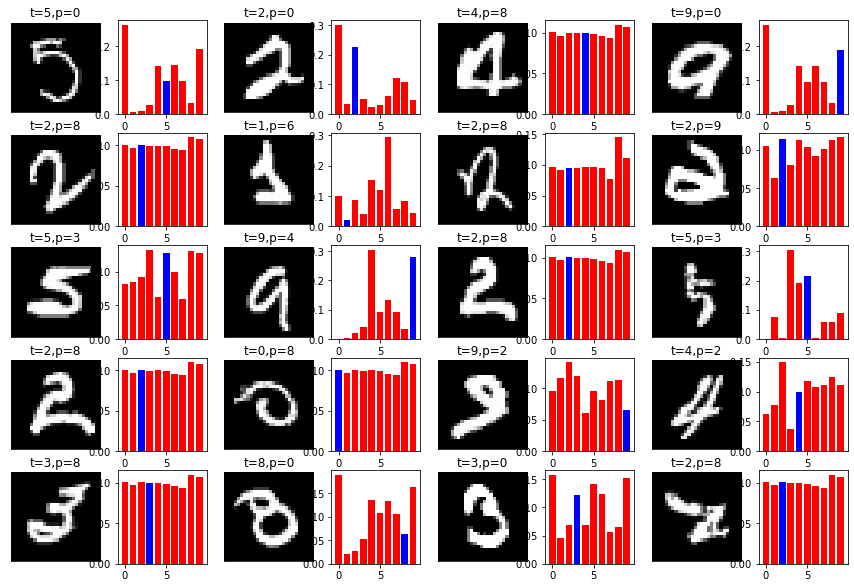

In [137]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)